In [64]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.metrics import mean_squared_log_error
import pickle
from sklearn.utils import resample

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
data_dir = '/content/drive/MyDrive/Machine/data'
os.listdir(data_dir)

['sample_submission.csv',
 'train.csv',
 'test.csv',
 'submission_1000000.csv',
 'submission_500000.csv',
 'submission_100000.csv',
 'submission_1456603_1.csv',
 'train_processed.csv',
 'test_processed.csv']

In [4]:
train_dir = data_dir + '/train.csv'
train_df = pd.read_csv(train_dir)
train_df.sample(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1315927,id1779755,2,2016-02-08 14:08:35,2016-02-08 14:11:56,2,-73.991577,40.727051,-73.983704,40.738178,N,201
108162,id0966310,2,2016-03-11 13:23:08,2016-03-11 13:38:09,3,-73.984543,40.724735,-74.006851,40.729324,N,901
281561,id0857384,1,2016-05-20 15:37:08,2016-05-20 15:43:37,2,-73.961166,40.801651,-73.975990,40.780560,N,389
478637,id3914076,2,2016-06-06 16:22:01,2016-06-06 16:29:58,1,-73.986259,40.741840,-73.995049,40.748852,N,477
332306,id0731769,2,2016-02-25 16:51:57,2016-02-25 16:55:23,1,-73.984261,40.760109,-73.990021,40.752453,N,206
613726,id3654760,1,2016-06-14 05:59:31,2016-06-14 06:07:36,1,-73.990059,40.757343,-73.981567,40.751499,N,485
762998,id3313802,2,2016-03-19 20:44:21,2016-03-19 20:49:14,1,-73.980110,40.760506,-73.967644,40.757889,N,293
482633,id0660234,1,2016-03-14 22:32:55,2016-03-14 22:44:26,1,-73.985497,40.738338,-73.997223,40.756210,N,691
523117,id0086785,2,2016-06-23 23:20:07,2016-06-23 23:27:07,6,-73.955803,40.772072,-73.945358,40.774429,N,420
922029,id0762277,2,2016-04-24 09:05:33,2016-04-24 09:09:24,1,-73.968773,40.798939,-73.976837,40.788170,N,231


In [5]:
test_dir = data_dir + '/test.csv'
test_df = pd.read_csv(test_dir)
test_df.sample(10)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
227058,id2732484,1,2016-04-25 17:19:47,1,-73.984367,40.749104,-73.975143,40.741463,N
235556,id3976208,1,2016-04-23 00:31:28,1,-73.955856,40.714069,-73.966064,40.713608,N
438646,id2377862,1,2016-02-26 07:37:41,1,-73.960968,40.756313,-73.962509,40.766937,N
32604,id3865132,1,2016-06-21 07:37:05,1,-73.965843,40.794819,-73.987717,40.754948,N
559772,id1439687,1,2016-01-21 00:14:01,1,-74.004311,40.742344,-74.003273,40.733032,N
101333,id1772833,1,2016-05-31 18:30:29,1,-73.990974,40.750202,-73.981293,40.762966,N
383751,id3275811,2,2016-03-12 12:58:28,1,-73.989853,40.767372,-73.979553,40.767014,N
592286,id2774251,2,2016-01-11 14:51:45,5,-73.983292,40.734489,-73.974968,40.741829,N
521948,id1520667,1,2016-02-02 19:40:32,2,-73.990013,40.761490,-74.006210,40.736954,N
235604,id2487325,2,2016-04-23 00:15:13,6,-73.973343,40.743790,-73.951233,40.774319,N


In [6]:
train_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [7]:
# remove outliers
train_mean = np.mean(train_df['trip_duration'])
train_std = np.std(train_df['trip_duration'])
train_df = train_df[(train_mean - 5 * train_std <= train_df.trip_duration) & (train_df.trip_duration <= train_mean + 5 * train_std)]
train_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.456603e+06,1.456603e+06,1.456603e+06,1.456603e+06,1.456603e+06,1.456603e+06,1.456603e+06
mean,1.534303e+00,1.663950e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,8.376007e+02
std,4.988221e-01,1.313619e+00,7.093200e-02,3.288342e-02,7.067477e-02,3.588855e-02,6.694573e+02
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073589e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075453e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396302e+01,4.076981e+01,1.073000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,2.706400e+04


In [8]:
# Convert dates to pd format so we can easily manipulate them
train_df.pickup_datetime = pd.to_datetime(train_df.pickup_datetime)
train_df.loc[:, 'pickup_date'] = train_df.pickup_datetime.dt.date

train_df.dropoff_datetime = pd.to_datetime(train_df.dropoff_datetime)

test_df.pickup_datetime = pd.to_datetime(test_df.pickup_datetime)
test_df.loc[:, 'pickup_date'] = test_df.pickup_datetime.dt.date


In [9]:
# Split the date to Month, Day, Week, and Hour
def split_date(df):
    df['day'] = df['pickup_datetime'].dt.day
    df['hour'] = df['pickup_datetime'].dt.hour
    df['month'] = df['pickup_datetime'].dt.month
    df['week'] = df['pickup_datetime'].dt.dayofweek
    return df

train_df = split_date(train_df)
test_df = split_date(test_df)

train_df.sample(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,day,hour,month,week
492860,id0674327,1,2016-03-19 16:55:00,2016-03-19 17:05:17,1,-73.967079,40.761173,-73.981987,40.769966,N,617,2016-03-19,19,16,3,5
1300949,id2348554,2,2016-05-16 08:44:03,2016-05-16 08:56:34,4,-73.987991,40.779572,-73.970528,40.759430,N,751,2016-05-16,16,8,5,0
309779,id2441700,2,2016-01-05 08:07:06,2016-01-05 08:23:50,1,-74.004028,40.738312,-73.969330,40.766842,N,1004,2016-01-05,5,8,1,1
619253,id2417152,1,2016-04-05 12:40:16,2016-04-05 12:57:30,1,-73.964706,40.770016,-73.976624,40.754421,N,1034,2016-04-05,5,12,4,1
1090601,id3970053,1,2016-05-23 22:03:52,2016-05-23 22:05:59,1,-73.978912,40.749111,-73.978111,40.743965,N,127,2016-05-23,23,22,5,0
694961,id1781824,2,2016-03-25 22:44:40,2016-03-25 23:00:59,3,-74.007217,40.735672,-73.984901,40.702309,N,979,2016-03-25,25,22,3,4
1269486,id1661066,1,2016-05-07 11:44:49,2016-05-07 11:48:05,1,-73.985672,40.735329,-73.977585,40.743786,N,196,2016-05-07,7,11,5,5
394056,id2856218,1,2016-01-08 22:14:47,2016-01-08 22:34:22,3,-73.983238,40.734795,-73.985161,40.717815,N,1175,2016-01-08,8,22,1,4
1069443,id0525313,1,2016-02-16 01:27:23,2016-02-16 02:15:24,3,-73.988396,40.763962,-73.980309,40.756737,N,2881,2016-02-16,16,1,2,1
1348652,id2238292,2,2016-06-05 14:18:20,2016-06-05 14:28:03,5,-73.962517,40.763577,-73.986931,40.729733,N,583,2016-06-05,5,14,6,6


In [10]:
matplotlib.rcParams['figure.figsize'] = (10,6)

def show_hist(col_name):
    plt.hist(train_df[col_name].values, bins=50)
    plt.xlabel(col_name)
    plt.ylabel('count')
    plt.show()

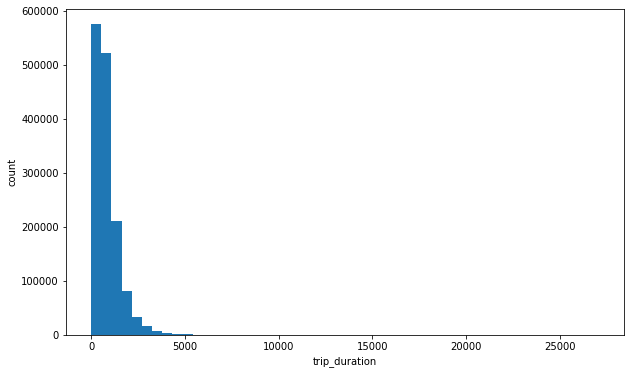

In [11]:
show_hist('trip_duration')

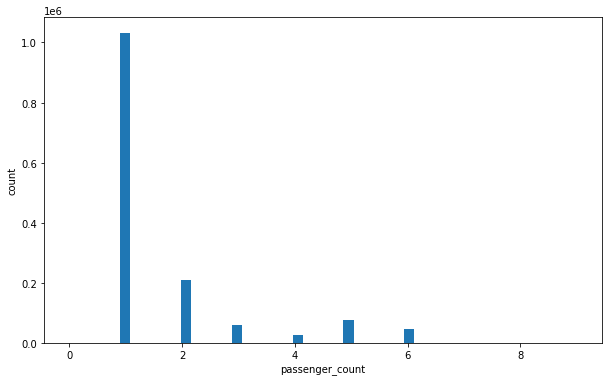

In [12]:
show_hist('passenger_count')

In [13]:
R = 6371

# The haversine distance which is the great-circle distance between two points on a sphere given their longitudes and latitudes
def haversine_distance(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * R * np.arcsin(np.sqrt(d))
    return h

def manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_distance(lat1, lng1, lat1, lng2)
    b = haversine_distance(lat1, lng1, lat2, lng1)
    return a + b

def direction(lat1, lng1, lat2, lng2):
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

In [14]:
train_df.loc[:, 'haversine_distance'] = haversine_distance(train_df.pickup_latitude.values, train_df.pickup_longitude.values, train_df.dropoff_latitude.values, train_df.dropoff_longitude.values)
train_df.loc[:, 'manhattan_distance'] = manhattan_distance(train_df.pickup_latitude.values, train_df.pickup_longitude.values, train_df.dropoff_latitude.values, train_df.dropoff_longitude.values)
train_df.loc[:, 'direction'] = direction(train_df.pickup_latitude.values, train_df.pickup_longitude.values, train_df.dropoff_latitude.values, train_df.dropoff_longitude.values)

test_df.loc[:, 'haversine_distance'] = haversine_distance(test_df.pickup_latitude.values, test_df.pickup_longitude.values, test_df.dropoff_latitude.values, test_df.dropoff_longitude.values)
test_df.loc[:, 'manhattan_distance'] = manhattan_distance(test_df.pickup_latitude.values, test_df.pickup_longitude.values, test_df.dropoff_latitude.values, test_df.dropoff_longitude.values)
test_df.loc[:, 'direction'] = direction(test_df.pickup_latitude.values, test_df.pickup_longitude.values, test_df.dropoff_latitude.values, test_df.dropoff_longitude.values)

In [15]:
train_df.sample(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,day,hour,month,week,haversine_distance,manhattan_distance,direction
553234,id1180495,2,2016-06-17 09:19:39,2016-06-17 09:28:58,4,-73.985497,40.756351,-74.000687,40.758381,N,559,2016-06-17,17,9,6,4,1.299183,1.505115,-79.992338
1330835,id3736851,1,2016-02-29 10:43:45,2016-02-29 11:06:52,1,-73.972656,40.743408,-73.997925,40.721027,N,1387,2016-02-29,29,10,2,0,3.275130,4.617403,-139.443450
821900,id3495014,1,2016-06-26 19:53:20,2016-06-26 19:57:44,2,-73.977028,40.790047,-73.980965,40.774662,N,264,2016-06-26,26,19,6,6,1.742514,2.042121,-169.033069
798423,id3448327,1,2016-04-01 22:51:15,2016-04-01 23:09:10,1,-73.992905,40.757763,-73.987350,40.729061,N,1075,2016-04-01,1,22,4,4,3.225612,3.659309,171.657249
534822,id0850292,1,2016-02-07 11:42:32,2016-02-07 12:01:57,1,-74.016113,40.706341,-73.978477,40.757122,N,1165,2016-02-07,7,11,2,6,6.476177,8.819040,29.306845
1209872,id3133378,2,2016-06-02 09:11:52,2016-06-02 09:36:40,5,-73.978951,40.752716,-74.005402,40.719921,N,1488,2016-06-02,2,9,6,3,4.273725,5.874714,-148.560279
317387,id0116926,2,2016-03-18 20:59:42,2016-03-18 21:09:00,2,-73.990005,40.740978,-74.000549,40.742271,N,558,2016-03-18,18,20,3,4,0.899859,1.032100,-80.801413
1405375,id1898108,1,2016-05-28 18:19:17,2016-05-28 18:31:30,2,-73.985764,40.778427,-73.959160,40.783306,N,733,2016-05-28,28,18,5,5,2.304748,2.782587,76.376565
1243398,id3704549,1,2016-04-08 14:18:10,2016-04-08 14:23:37,2,-73.982269,40.769608,-73.983856,40.761963,N,327,2016-04-08,8,14,4,4,0.860489,0.983685,-171.064486
1228249,id0280981,1,2016-03-09 16:12:23,2016-03-09 16:42:37,1,-73.862831,40.769054,-73.966240,40.803127,N,1814,2016-03-09,9,16,3,2,9.494823,12.497122,-66.448602


In [16]:
numerical_cols = ['haversine_distance', 'manhattan_distance', 'direction' ]
categorical_cols = ['vendor_id', 'passenger_count', 'store_and_fwd_flag', 'day', 'hour', 'month', 'week' ]

# Normalize the numerical columns to make sure they use the same scale
scaler = MinMaxScaler().fit(train_df[numerical_cols])
train_df[numerical_cols] = scaler.transform(train_df[numerical_cols])
test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])

# Convert categorical data into dummy or indicator variables.
# We have few categorical columns and few classes for each column
# So, we can use the OneHotEncoder
def encode_categorical(df):
    for categorical in categorical_cols:
        encoded_cat = pd.get_dummies(df[categorical], prefix=categorical, prefix_sep='_')
        df = (df.drop([categorical], axis=1)).join(encoded_cat)
    return df
train_df = encode_categorical(train_df)
test_df = encode_categorical(test_df)

In [17]:
train_df.sample(10)

,id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_date,haversine_distance,...,month_4,month_5,month_6,week_0,week_1,week_2,week_3,week_4,week_5,week_6
1185215,id0758558,2016-02-29 17:13:01,2016-02-29 17:15:48,-73.983963,40.721626,-73.985390,40.722069,167,2016-02-29,0.000105,...,0,0,0,1,0,0,0,0,0,0
66542,id1361959,2016-02-24 19:34:19,2016-02-24 20:03:42,-73.988579,40.741020,-73.950378,40.771252,1763,2016-02-24,0.003750,...,0,0,0,0,0,1,0,0,0,0
168544,id0036746,2016-02-06 22:00:00,2016-02-06 22:05:53,-73.978043,40.762711,-73.978394,40.762791,353,2016-02-06,0.000025,...,0,0,0,0,0,0,0,0,1,0
1272282,id1306307,2016-04-26 09:36:26,2016-04-26 09:46:15,-74.001579,40.746689,-73.981697,40.742329,589,2016-04-26,0.001405,...,1,0,0,0,1,0,0,0,0,0
733586,id1453227,2016-03-14 02:30:05,2016-03-14 02:53:12,-73.984695,40.768295,-73.987976,40.717293,1387,2016-03-14,0.004576,...,0,0,0,1,0,0,0,0,0,0
90676,id0771700,2016-01-09 20:02:38,2016-01-09 20:10:27,-73.989334,40.719139,-74.004990,40.715488,469,2016-01-09,0.001112,...,0,0,0,0,0,0,0,0,1,0
1038828,id2338053,2016-06-02 23:27:11,2016-06-02 23:33:28,-73.957420,40.769501,-73.959702,40.762764,377,2016-06-02,0.000623,...,0,0,1,0,0,0,1,0,0,0
353520,id1243507,2016-01-11 12:06:14,2016-01-11 13:15:38,-73.989113,40.758511,-73.982155,40.757103,4164,2016-01-11,0.000489,...,0,0,0,1,0,0,0,0,0,0
389147,id0698917,2016-01-07 14:39:14,2016-01-07 14:48:11,-73.983559,40.750301,-73.993858,40.734295,537,2016-01-07,0.001596,...,0,0,0,0,0,0,1,0,0,0
991219,id0559043,2016-05-02 19:26:38,2016-05-02 19:32:51,-73.969208,40.753841,-73.971031,40.755562,373,2016-05-02,0.000198,...,0,1,0,1,0,0,0,0,0,0


In [18]:
train_drop_cols = ['id', 'pickup_datetime', 'dropoff_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_date']
train_df = train_df.drop(train_drop_cols, axis = 1)
train_df.sample(10)

,trip_duration,haversine_distance,manhattan_distance,direction,vendor_id_1,vendor_id_2,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,...,month_4,month_5,month_6,week_0,week_1,week_2,week_3,week_4,week_5,week_6
18387,458,0.001198,0.001590,0.886801,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
305366,2263,0.003023,0.003274,0.526259,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
266209,587,0.001458,0.001740,0.947912,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
630367,998,0.002899,0.003847,0.113178,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
805668,577,0.000268,0.000349,0.340308,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
591899,299,0.002140,0.002735,0.080039,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1212446,176,0.000672,0.000859,0.080734,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
173104,1663,0.005522,0.006890,0.068515,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
1079067,780,0.002643,0.003438,0.159039,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2193,1591,0.003088,0.003035,0.992790,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [19]:
test_drop_cols = ['id', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_date']
test_df = test_df.drop(test_drop_cols, axis = 1)

In [20]:
test_df.sample(10)

,haversine_distance,manhattan_distance,direction,vendor_id_1,vendor_id_2,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,...,month_4,month_5,month_6,week_0,week_1,week_2,week_3,week_4,week_5,week_6
68041,0.002528,0.003324,0.100180,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
253549,0.001077,0.001337,0.566349,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
54019,0.006284,0.007753,0.563695,0,1,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
40090,0.008931,0.010578,0.549504,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
143930,0.000561,0.000733,0.595072,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
607124,0.001579,0.001487,0.250109,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
361332,0.002076,0.002625,0.175568,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
510604,0.004636,0.005131,0.218785,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
57302,0.001654,0.002072,0.179881,0,1,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
530685,0.003760,0.004596,0.810211,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
# The test_df has 83 columns while train_df has 86 columns 
missed_cols = list(set(train_df.columns) - set(test_df.columns))
missed_cols

['trip_duration', 'passenger_count_8', 'passenger_count_7']

In [22]:
test_df['passenger_count_7'] = 0
test_df['passenger_count_8'] = 0
test_df = test_df[list(train_df.columns.values)[1:]]
test_df.sample(10)

,haversine_distance,manhattan_distance,direction,vendor_id_1,vendor_id_2,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,...,month_4,month_5,month_6,week_0,week_1,week_2,week_3,week_4,week_5,week_6
404740,0.001902,0.002380,0.430327,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
450482,0.005675,0.005576,0.007165,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
378518,0.002761,0.002996,0.973277,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
81915,0.001321,0.001499,0.537504,1,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
307193,0.003776,0.004770,0.573900,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
145454,0.000785,0.000996,0.673933,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
605015,0.010821,0.014340,0.139416,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
310095,0.003012,0.003894,0.087014,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
388315,0.001117,0.001326,0.050248,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
92080,0.003153,0.003933,0.068307,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


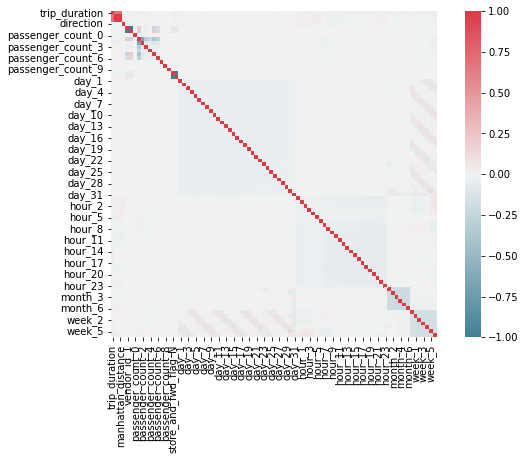

In [59]:
corr = train_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

In [23]:
# train_df.to_csv('/content/drive/MyDrive/Machine/data/train_processed.csv', index=False)
# test_df.to_csv('/content/drive/MyDrive/Machine/data/test_processed.csv', index=False)

In [60]:
models = {
    "random_forest": RandomForestRegressor(n_jobs = -1, random_state = 42),
    "linear_regression": LinearRegression(),
    "svm": svm.LinearSVC(random_state=42),
    "rbf_svm": svm.SVC(kernel='rbf'),
    # "poly_svm": svm.SVC(kernel='poly')
}

In [73]:
def run_expirement(size, model_name, do_resample = False):
  data = train_df[0:size]
  if do_resample:
    data = resample(train_df, n_samples=size)

  train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)
  
  train_X = train_data.drop(['trip_duration'], axis=1)
  train_y = train_data["trip_duration"]
  val_X = val_data.drop(['trip_duration'], axis=1)
  val_y = val_data["trip_duration"]

  print(train_X.shape, train_y.shape)

  print("Training...")
  model = models[model_name]
  model.fit(train_X, train_y)
  print("Training Done...")

  pickle.dump(model, open('/content/drive/MyDrive/Machine/models/'+str(model_name)+'_'+str(size)+'.sav', 'wb'))
  print("Models Saved...")

  print("Evaluating...")
  score = model.score(val_X, val_y), model.score(train_X, train_y)
  print("Score: ", score)

  print("Prediction...")
  train_preds = model.predict(train_X)
  train_preds = np.where(train_preds < 0, 0, train_preds)
  train_rmsle = mean_squared_log_error(train_y, train_preds, squared=False)
  print(str(size) + " Training RMSLE: ", train_rmsle)

  val_preds = model.predict(val_X)
  val_preds = np.where(val_preds < 0, 0, val_preds)
  val_rmsle = mean_squared_log_error(val_y, val_preds, squared=False)
  print(str(size) + " Validation RMSLE: ", val_rmsle)

In [58]:
def save_submission(size, model_name):
  submission_df = pd.read_csv(data_dir + '/sample_submission.csv')
  model = pickle.load(open('/content/drive/MyDrive/Machine/models/'+str(model_name)+'_'+str(size)+'.sav', 'rb'))
  test_preds = model.predict(test_df)
  submission_df['trip_duration'] = test_preds
  submission_df.to_csv('/content/drive/MyDrive/Machine/data/submission_'+str(model_name)+'_'+str(size)+'.csv', index=None)
  submission_df.sample(10)

In [76]:
run_expirement(10000, "linear_regression", True)
save_submission(10000, "linear_regression")

(8000, 85) (8000,)
Training...
Training Done...
Models Saved...
Evaluating...
Score:  (0.6544470860580209, 0.6342482414067846)
Prediction...
10000 Training RMSLE:  0.5583353306253344
10000 Validation RMSLE:  0.5535505441405885


In [71]:
run_expirement(500000, "linear_regression")
save_submission(500000, "linear_regression")

(400000, 85) (400000,)
Training...
Training Done...
Models Saved...
Evaluating...
Score:  (0.4828756467502633, 0.4783535523506306)
Prediction...
500000 Training RMSLE:  0.5888749485855709
500000 Validation RMSLE:  0.5913015598669251


In [72]:
run_expirement(train_df.shape[0], "linear_regression")
save_submission(train_df.shape[0], "linear_regression")

(1165282, 85) (1165282,)
Training...
Training Done...
Models Saved...
Evaluating...
Score:  (0.37564976338777945, 0.5859633206911201)
Prediction...
1456603 Training RMSLE:  0.5528478364041305
1456603 Validation RMSLE:  0.5526700556782578


In [28]:
# run_expirement(100000, "svm")

In [32]:
# save_submission(100000, "svm")

In [ ]:
run_expirement(500000, "rbf_svm")

(400000, 85) (400000,)
Training...


In [33]:
# run_expirement(100000)
# save_submission(100000)

In [34]:
# run_expirement(500000)
# save_submission(500000)

In [35]:
# run_expirement(1000000)
# save_submission(1000000)

In [36]:
# run_expirement(train_df.shape[0])
# save_submission(train_df.shape[0])